<a href="https://colab.research.google.com/github/ChintaLokesh/Deep_Learning_Neural_Network/blob/master/1st_April_VGG_Transfer_Learning_(Dogs_Vs_Cat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# VGG as an independent model -
# Can I use VGG for Dogs-Vs-Cats ? No, as ImageNet never had a broad category called Cat or Dog

# We will create a model for Dog & Cat ONLY, but we will use VGG for calculating feature . . .

In [ ]:
# Any typical CNN model is made up of 2 parts -
# 1. Conv Layers - where it finds features (ROI)
# 2. Cat Layers - where these features are further divided in to categories

In [ ]:
# We will not train our Conv Layer from scratch, we will use VGG's Conv Layer and
# then add custom Cat layers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

In [ ]:
vgg16 = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
! wget https://cdn.pixabay.com/photo/2016/02/19/15/46/labrador-retriever-1210559__480.jpg

--2023-04-01 16:21:33--  https://cdn.pixabay.com/photo/2016/02/19/15/46/labrador-retriever-1210559__480.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.14.16, 104.18.15.16, 2606:4700::6812:f10, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.14.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40911 (40K) [binary/octet-stream]
Saving to: ‘labrador-retriever-1210559__480.jpg’

labrador-retriever- 100%[===================>]  39.95K  --.-KB/s    in 0s      

2023-04-01 16:21:33 (122 MB/s) - ‘labrador-retriever-1210559__480.jpg’ saved [40911/40911]



In [ ]:
print(vgg16.input_shape)
print(vgg16.output_shape)

(None, 150, 150, 3)
(None, 4, 4, 512)


In [ ]:
image = cv2.cvtColor(cv2.imread("labrador-retriever-1210559__480.jpg"), cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (150, 150))

In [ ]:
image.shape

(150, 150, 3)

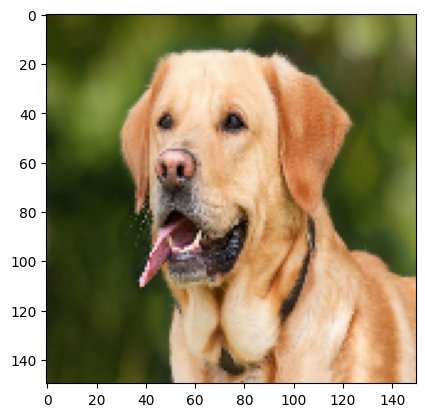

In [ ]:
plt.imshow(image)

In [ ]:
image = tf.keras.applications.vgg16.preprocess_input(image)
image = np.expand_dims(image, axis=0)

In [ ]:
image.shape

(1, 150, 150, 3)

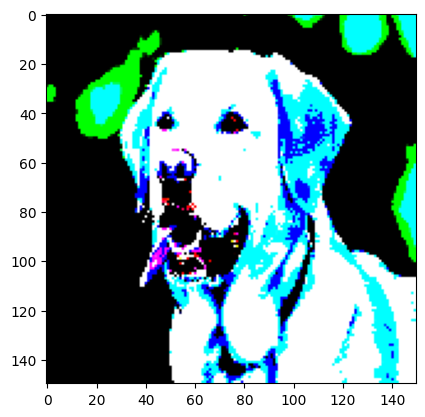

In [ ]:
plt.imshow(image[0])

In [ ]:
feature = vgg16.predict(image)

1/1 [==============================] - 8s 8s/step


In [ ]:
feature.shape #1 - image, 4 - height, 4 - wdith, 512 - features

(1, 4, 4, 512)

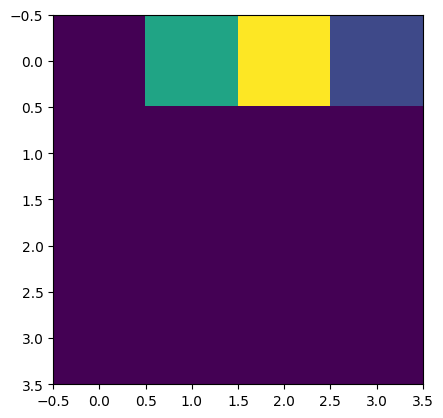

In [ ]:
plt.imshow(feature[0, :, :, 123])

In [ ]:
feature[0, :, :, 123]

array([[ 0.      , 10.21563 , 17.54038 ,  3.878984],
       [ 0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ]], dtype=float32)

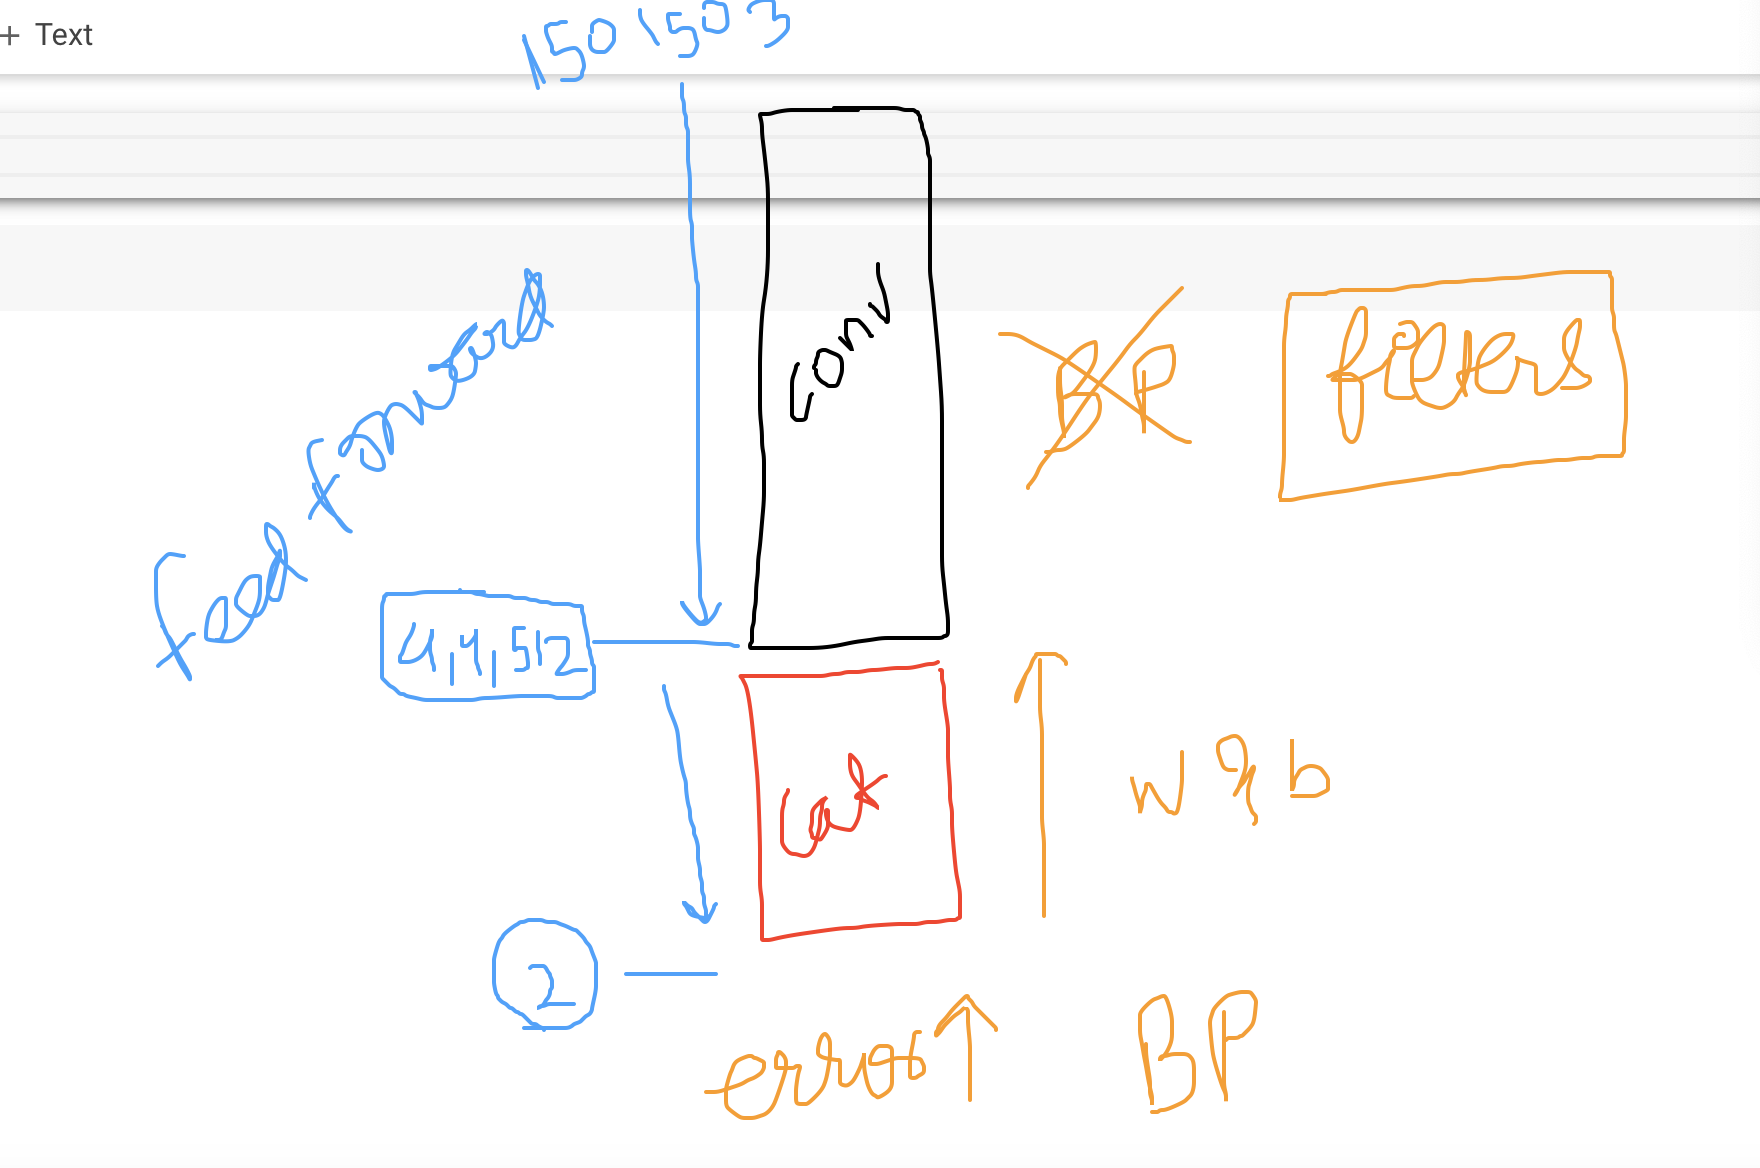

In [ ]:
# Freeze the Conv Layers of VGG! Freeze = Parameters of that layer wont be optimized while BP
# By default all layers trainable = True
for layer in vgg16.layers:
  layer.trainable = False
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
# vgg16.to_json()

In [ ]:
# Type of Models in Keras - Functional, Sequential
# Syntax (Seq)
# model = tf.keras.....
# model.add()
# model.add()
# model.add()


# Syntax (Fun)
# layers = tf.keras.layers.LAYER_NAME() (previous_layer_name)

In [ ]:
flat = tf.keras.layers.Flatten() (vgg16.output)
dense = tf.keras.layers.Dense(64, activation='relu') (flat)
output = tf.keras.layers.Dense(2, activation="softmax") (dense)

In [ ]:
final_model = tf.keras.models.Model(inputs=[vgg16.input], outputs=[output])

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
for layer in final_model.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten True
dense True
dense_1 True


In [ ]:
# Model - ✅

In [ ]:
import kaggle

OSError: ignored

In [ ]:
! mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
! kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:36<00:00, 24.1MB/s]
100% 812M/812M [00:36<00:00, 23.4MB/s]


In [ ]:
! unzip -q dogs-vs-cats.zip

In [ ]:
! unzip -q train.zip

In [ ]:
batch_size = 64

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.1,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [ ]:
data = pd.DataFrame(columns=["filename", 'label'])
data["filename"] = os.listdir("train/")
data["label"] = data.filename.str.split(".", expand=True)[0]

In [ ]:
data.sample(5)

,filename,label
10097,dog.11674.jpg,dog
10128,cat.7813.jpg,cat
663,dog.5262.jpg,dog
8923,dog.3153.jpg,dog
7826,cat.5657.jpg,cat


In [ ]:
train_idg = idg.flow_from_dataframe(dataframe=data, directory="train/",
                                    x_col="filename", y_col="label",
                                    target_size=(150, 150),
                                    batch_size=batch_size, subset='training')

Found 22500 validated image filenames belonging to 2 classes.


In [ ]:
val_idg = idg.flow_from_dataframe(dataframe=data, directory = "train/",
                                  x_col="filename", y_col='label',
                                  target_size=(150, 150),
                                  batch_size=batch_size, subset="validation")

Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
final_model.compile(tf.keras.optimizers.SGD(), loss=tf.keras.losses.categorical_crossentropy,
                                  metrics=["acc"])

In [ ]:
final_model_history = final_model.fit(train_idg, validation_data=val_idg, epochs=10, batch_size=batch_size)

Epoch 1/10
352/352 [==============================] - 100s 268ms/step - loss: 1.6072 - acc: 0.9513 - val_loss: 0.1013 - val_acc: 0.9620
Epoch 2/10
352/352 [==============================] - 90s 255ms/step - loss: 0.0628 - acc: 0.9756 - val_loss: 0.0820 - val_acc: 0.9704
Epoch 3/10
352/352 [==============================] - 90s 257ms/step - loss: 0.0462 - acc: 0.9824 - val_loss: 0.0897 - val_acc: 0.9704
Epoch 4/10
352/352 [==============================] - 90s 256ms/step - loss: 0.0326 - acc: 0.9866 - val_loss: 0.0953 - val_acc: 0.9692
Epoch 5/10
352/352 [==============================] - 91s 258ms/step - loss: 0.0240 - acc: 0.9904 - val_loss: 0.1190 - val_acc: 0.9672
Epoch 6/10
352/352 [==============================] - 90s 254ms/step - loss: 0.0168 - acc: 0.9927 - val_loss: 0.1357 - val_acc: 0.9672
Epoch 7/10
170/352 [=============>................] - ETA: 41s - loss: 0.0116 - acc: 0.9945

KeyboardInterrupt: ignored

In [ ]:
! nvidia-smi

Sat Apr  1 16:20:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
final_model.output_shape # it can only predict CAT & DOGS!

(None, 2)

In [ ]:
image = cv2.cvtColor(cv2.imread("labrador-retriever-1210559__480.jpg"), cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (150, 150))
image = tf.keras.applications.vgg16.preprocess_input(image)
image = np.expand_dims(image, axis=0)

In [ ]:
image.shape

(1, 150, 150, 3)

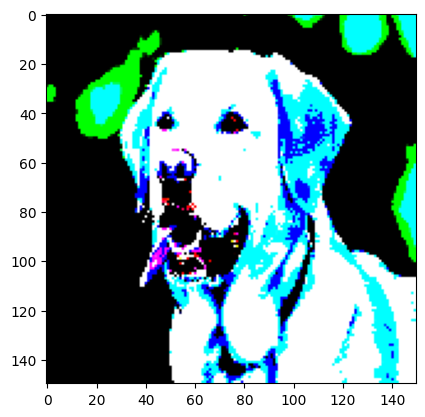

In [ ]:
plt.imshow(image[0])

In [ ]:
result = final_model.predict(image)

1/1 [==============================] - 0s 137ms/step


In [ ]:
result

array([[0., 1.]], dtype=float32)

In [ ]:
np.argmax(result)

1

In [ ]:
category_dict = train_idg.class_indices
category_dict

{'cat': 0, 'dog': 1}